In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
def linear(x,a,b):
    return a*x+b

In [3]:
#correlation function of uncorrelated disorder system
Corr=np.zeros(250,dtype=complex)
n_sample=0
error_threshold=1e-7
for i in range(56):
    filename=r'CorParallel_2\Corr'+str(i+1)+r'_uncorr.txt'
    f=open(filename,'r').readlines()
    for j in range(100):
        if float(f[4*j].split()[3])<1e-7:
            Re_Corr=np.array([float(f[4*j+1].split()[i]) for i in range(250)])
            Im_Corr=np.array([float(f[4*j+2].split()[i]) for i in range(250)])  
            Corr += Re_Corr+1j*Im_Corr
            n_sample += 1
Corr=Corr/n_sample

In [4]:
#correlation function of correlated disorder system
Corr_c=np.zeros(250,dtype=complex)
n_sample=0
error_threshold=1e-7
for i in range(56):
    filename=r'CorParallel_2\Corr_1 ('+str(i+1)+').txt'
    f=open(filename,'r').readlines()
    for j in range(100):
        if float(f[4*j].split()[3])<error_threshold:
            Re_Corr=np.array([float(f[4*j+1].split()[i]) for i in range(250)])
            Im_Corr=np.array([float(f[4*j+2].split()[i]) for i in range(250)])  
            Corr_c += Re_Corr+1j*Im_Corr
            n_sample += 1
for i in range(56):
    filename=r'CorParallel_2\Corr'+str(i+1)+'.txt'
    f=open(filename,'r').readlines()
    for j in range(100):
        if float(f[4*j].split()[3])<error_threshold:
            Re_Corr=np.array([float(f[4*j+1].split()[i]) for i in range(250)])
            Im_Corr=np.array([float(f[4*j+2].split()[i]) for i in range(250)])  
            Corr_c += Re_Corr+1j*Im_Corr
            n_sample += 1
Corr_c=Corr_c/n_sample

In [5]:
#entanglement entropy data
EE_data=np.load('EE_data.npy',allow_pickle=True)[0]

In [6]:
N_List=np.array([40,80,120,160,200,320,480,1000,1200,1600])
popt_corr_minus1,pcov_corr_minus1=curve_fit(linear,np.log(N_List[:7]),np.real(EE_data['Corr_mu=-1'][:7,0]),maxfev=10000)
popt_uncorr_minus1,pcov_uncorr_minus1=curve_fit(linear,np.log(N_List[:7]),np.real(EE_data['Uncorr_mu=-1'][:7,0]),maxfev=10000)

C:\Users\admin\AppData\Local\Temp\ipykernel_418400\4036362753.py:25: RuntimeWarning: divide by zero encountered in log
  axs_0.scatter(np.log(np.arange(250)),np.log(np.abs(Corr_c))[:],color=color_C_corr)
C:\Users\admin\AppData\Local\Temp\ipykernel_418400\4036362753.py:28: RuntimeWarning: divide by zero encountered in log
  axs_0.arrow(np.log(np.arange(250))[2],np.log(np.abs(Corr_c))[2],5.1-np.log(np.arange(250))[2],-10.2-np.log(np.abs(Corr_c))[2],head_length=0.005,head_width=0.005,facecolor='blue',edgecolor='blue')
C:\Users\admin\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\admin\anaconda3\lib\site-packages\numpy\ma\core.py:3380: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
C:\Users\admin\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real disca

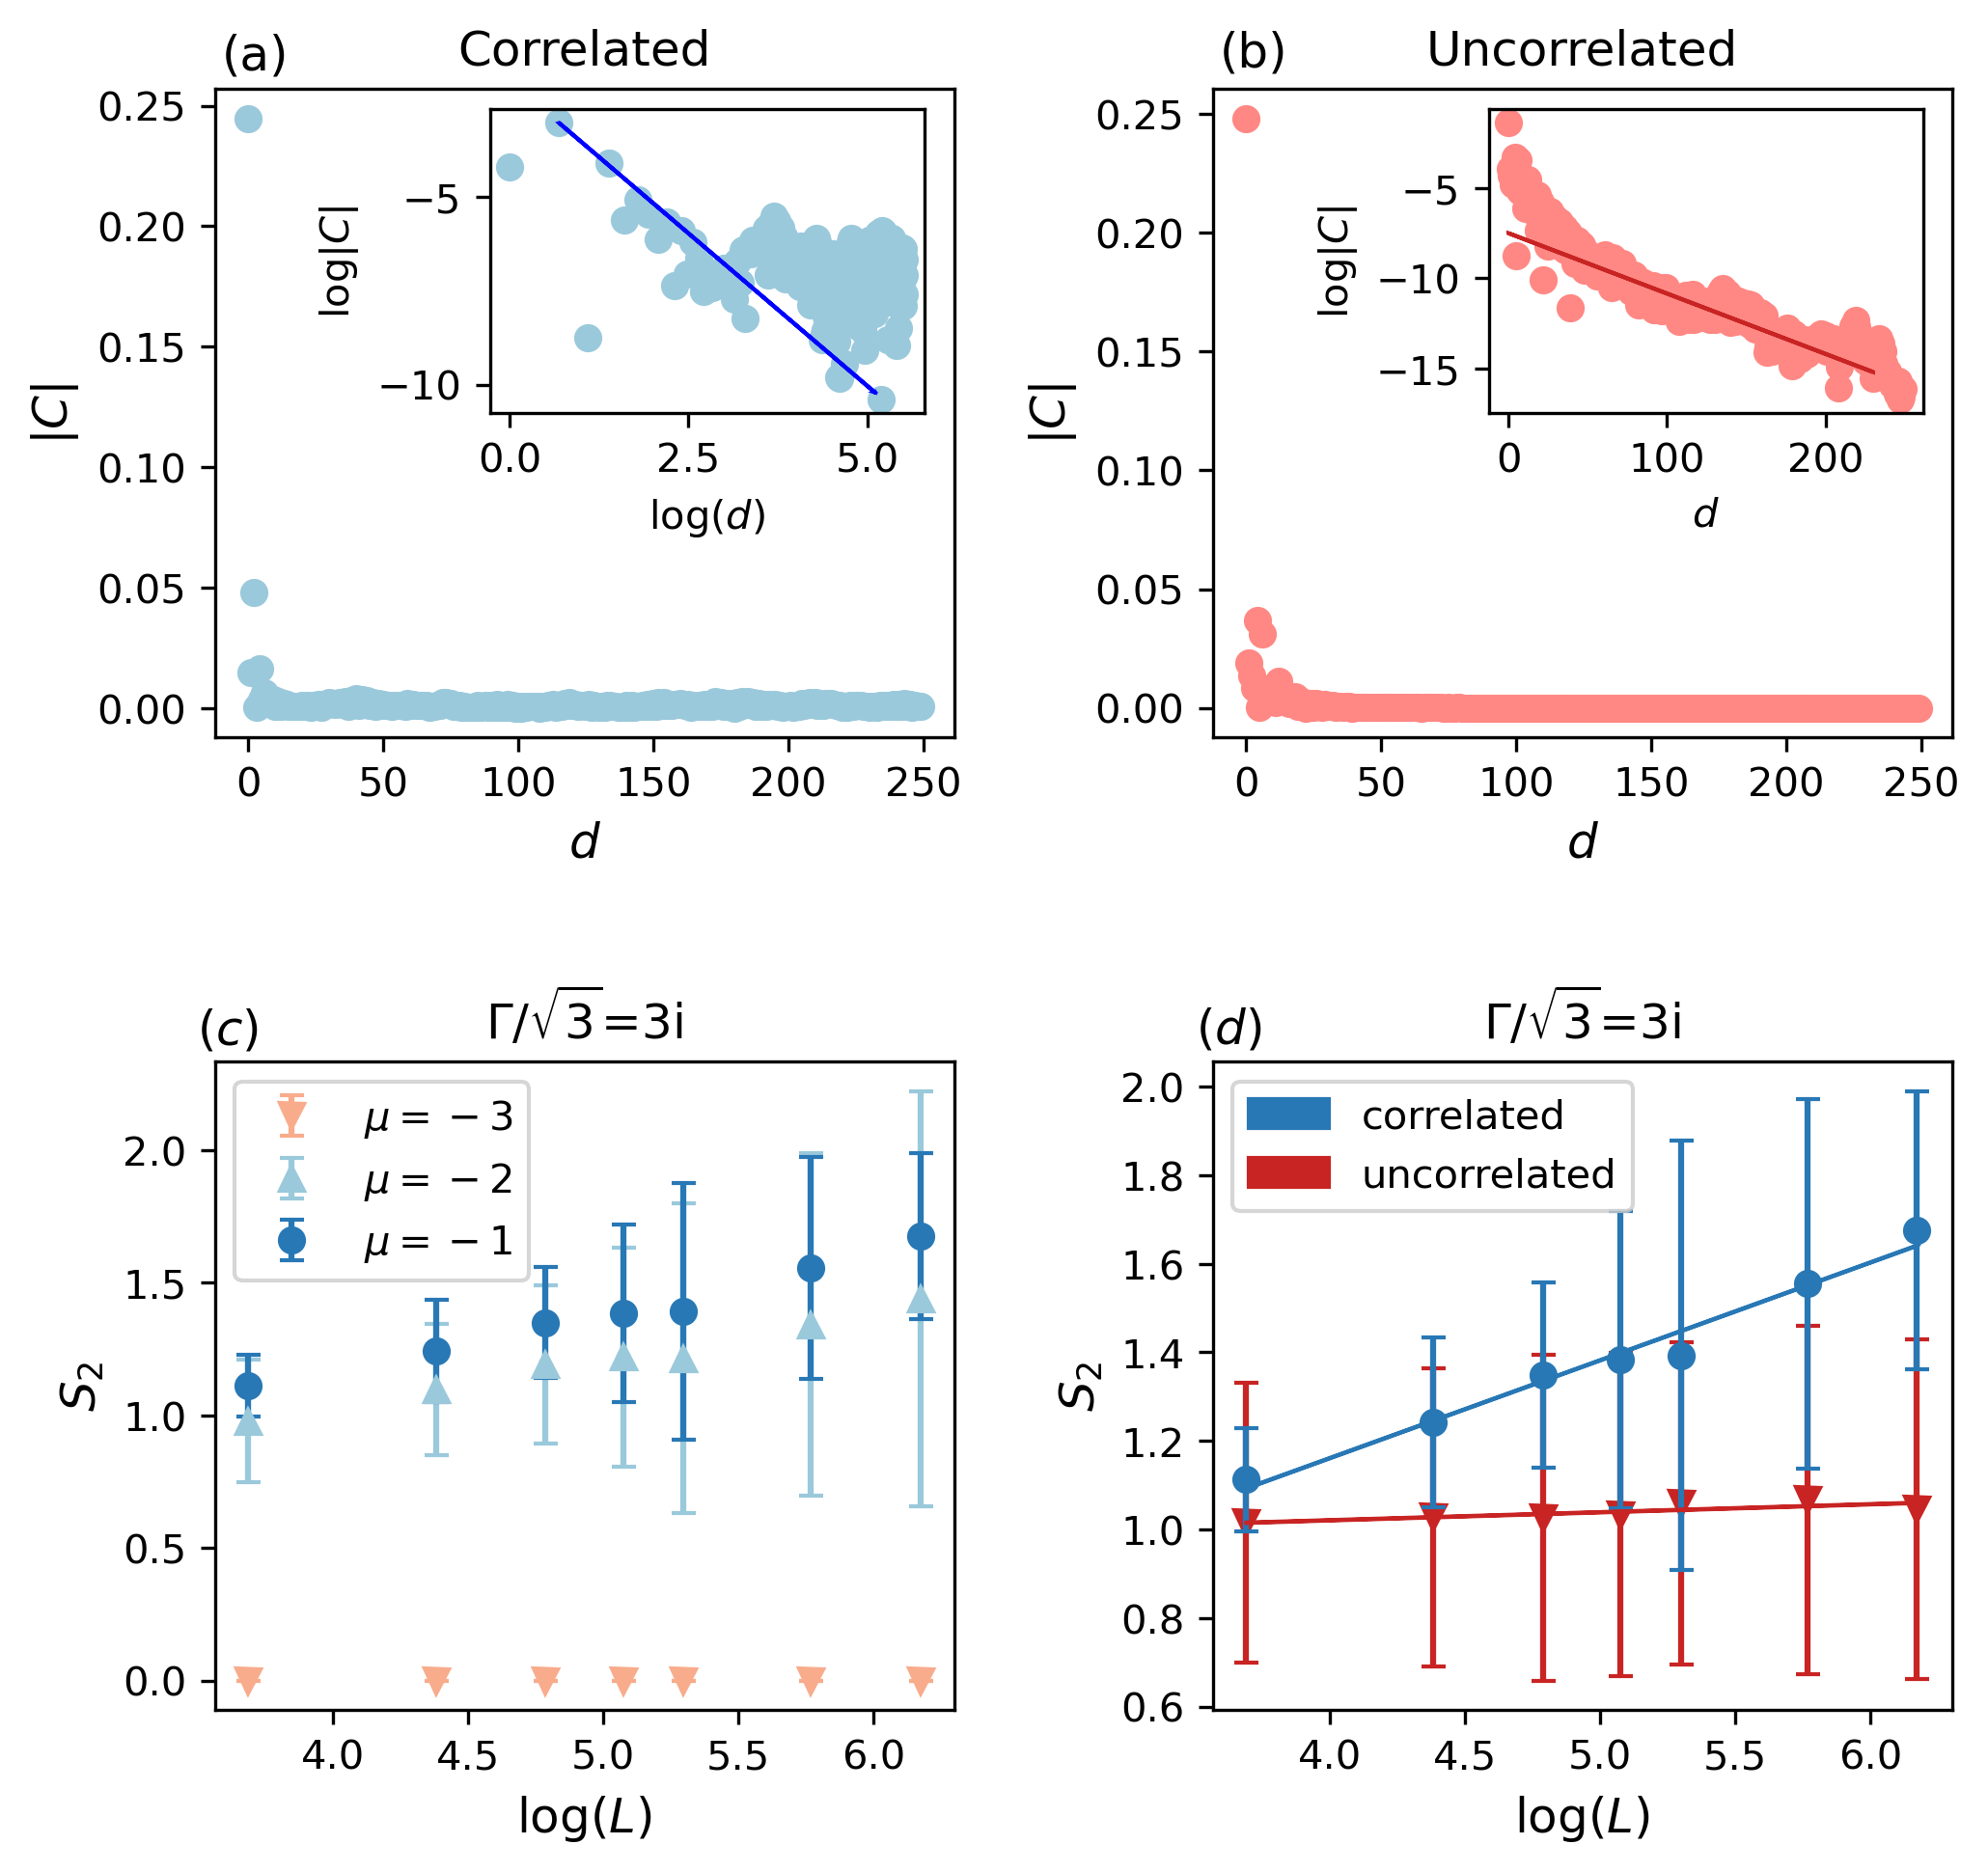

In [7]:
my_dpi=300
N_List=np.array([40,80,120,160,200,320,480,1000,1200,1600])
fig,axs=plt.subplots(2,2,figsize=(10,7),dpi=my_dpi,sharex=False,sharey=False)

color_C_corr='#9AC9DB'
color_C_uncorr='#FF8884'
color_EE_corr_muminus1='#2878B5'
color_EE_corr_muminus2='#9AC9DB'
color_EE_corr_muminus3='#F8AC8C'
color_EE_uncorr_muminus1='#C82423'

for j in range(2):
    axs[1][j].set_xlabel(r'$\operatorname{log}(L)$',fontsize=12)
    axs[1][j].set_ylabel(r'$S_2$',fontsize=12)
    
axs_0=fig.add_axes([0.295,0.47+0.42-0.15,0.15,0.15])
axs_1=fig.add_axes([0.64,0.47+0.42-0.15,0.15,0.15])

axs[0][0].scatter(np.arange(250),np.abs(Corr_c)[:],color=color_C_corr)
axs[0][0].set_xlabel(r'$d$',fontsize=12)
axs[0][0].set_ylabel(r'$|C|$',fontsize=12)
axs[0][0].text(-10,0.265,r'(a)',fontsize=12)
axs[0][0].set_title('Correlated')

axs_0.scatter(np.log(np.arange(250)),np.log(np.abs(Corr_c))[:],color=color_C_corr)
axs_0.set_xlabel(r'$\operatorname{log}(d)$')
axs_0.set_ylabel(r'$\operatorname{log}|C|$')
axs_0.arrow(np.log(np.arange(250))[2],np.log(np.abs(Corr_c))[2],5.1-np.log(np.arange(250))[2],-10.2-np.log(np.abs(Corr_c))[2],head_length=0.005,head_width=0.005,facecolor='blue',edgecolor='blue')


axs[0][1].scatter(np.arange(250),np.abs(Corr),color=color_C_uncorr)
axs[0][1].set_xlabel(r'$d$',fontsize=12)
axs[0][1].set_ylabel(r'$|C|$',fontsize=12)
axs[0][1].text(-10,0.27,r'(b)',fontsize=12)
axs[0][1].set_title('Uncorrelated')
axs_1.scatter(np.arange(250),np.log(np.abs(Corr)[:]),color=color_C_uncorr)
# axs_1.arrow(np.arange(250)[70],np.log(np.abs(Corr))[70],230-np.arange(250)[70],-15.2-np.log(np.abs(Corr))[70],head_length=0.005,head_width=0.005,facecolor='coral',edgecolor='coral')
axs_1.arrow(0,-7.5,230-0,-15.2+7.5,head_length=0.005,head_width=0.005,facecolor='#C82423',edgecolor='#C82423')
axs_1.set_xlabel(r'$d$')
axs_1.set_ylabel(r'$\operatorname{log}|C|$')

axs[1][0].errorbar(np.log(N_List[:7]),EE_data['Corr_mu=-3'][:7,0],yerr=EE_data['Corr_mu=-3'][:7,1],fmt='v',color=color_EE_corr_muminus3,capsize=3)
axs[1][0].errorbar(np.log(N_List[:7]),EE_data['Corr_mu=-2'][:7,0],yerr=EE_data['Corr_mu=-2'][:7,1],fmt='^',color=color_EE_corr_muminus2,capsize=3)
axs[1][0].errorbar(np.log(N_List[:7]),EE_data['Corr_mu=-1'][:7,0],yerr=EE_data['Corr_mu=-1'][:7,1],fmt='o',color=color_EE_corr_muminus1,capsize=3)
axs[1][0].legend([r'$\mu=-3$',r'$\mu=-2$',r'$\mu=-1$'])
axs[1][0].set_title(r'$\Gamma/\sqrt{3}$=3i')
axs[1][0].text(3.5,2.4,r'$(c)$',fontsize=12)

axs[1][1].errorbar(np.log(N_List[:7]),EE_data['Corr_mu=-1'][:7,0],yerr=EE_data['Corr_mu=-1'][:7,1],fmt='o',color=color_EE_corr_muminus1,capsize=3,zorder=1)
axs[1][1].errorbar(np.log(N_List[:7]),EE_data['Uncorr_mu=-1'][:7,0],yerr=EE_data['Uncorr_mu=-1'][:7,1],fmt='v',color=color_EE_uncorr_muminus1,capsize=3,zorder=0)
# axs[1][1].set_xlabel(r'$\operatorname{log}(L)$')
# axs[1][1].set_ylabel(r'$S_2$')
axs[1][1].arrow(np.log(40),popt_corr_minus1[0]*np.log(40)+popt_corr_minus1[1],np.log(480)-np.log(40),popt_corr_minus1[0]*(np.log(480)-np.log(40)),head_length=0.005,head_width=0.005,facecolor=color_EE_corr_muminus1,edgecolor=color_EE_corr_muminus1)
axs[1][1].arrow(np.log(40),popt_uncorr_minus1[0]*np.log(40)+popt_uncorr_minus1[1],np.log(480)-np.log(40),popt_uncorr_minus1[0]*(np.log(480)-np.log(40)),head_length=0.005,head_width=0.005,facecolor=color_EE_uncorr_muminus1,edgecolor=color_EE_uncorr_muminus1)
axs[1][1].set_title(r'$\Gamma/\sqrt{3}$=3i')
axs[1][1].legend(['correlated','uncorrelated'])
axs[1][1].text(3.5,2.1,r'$(d)$',fontsize=12)

    
# axs[1][0].errorbar(np.log([Data_PBC_upto2000_gamma300[np.where(Data_PBC_upto2000_gamma300[:,1]==-2)[0],0][i] for i in range(11)]),Data_PBC_upto2000_gamma300[np.where(Data_PBC_upto2000_gamma300[:,1]==-2)[0],2],yerr=Data_PBC_upto2000_gamma300[np.where(Data_PBC_upto2000_gamma300[:,1]==-2)[0],3],fmt='v',color='orange',capsize=3)
# axs[1][0].errorbar(np.log([Data_PBC_upto2000_gamma300[np.where(Data_PBC_upto2000_gamma300[:,1]==-1)[0],0][i] for i in range(11)]),Data_PBC_upto2000_gamma300[np.where(Data_PBC_upto2000_gamma300[:,1]==-1)[0],2],yerr=Data_PBC_upto2000_gamma300[np.where(Data_PBC_upto2000_gamma300[:,1]==-1)[0],3],fmt='^',color='forestgreen',capsize=3)
# axs[1][0].errorbar(np.log([Data_PBC_upto2000_gamma300[np.where(Data_PBC_upto2000_gamma300[:,1]==0)[0],0][i] for i in range(11)]),Data_PBC_upto2000_gamma300[np.where(Data_PBC_upto2000_gamma300[:,1]==0)[0],2],yerr=Data_PBC_upto2000_gamma300[np.where(Data_PBC_upto2000_gamma300[:,1]==0)[0],3],fmt='o',color='crimson',capsize=3)
# axs[1][0].legend([r'$\mu=-2$',r'$\mu=-1$',r'$\mu=0$'])
# axs[1][0].set_title(r'$\Gamma/\sqrt{3}$=90i')

# axs[1][1].errorbar(np.log(Renyi2_List_corr_300j[:,0]),Renyi2_List_corr_300j[:,1],yerr=Renyi2_List_corr_300j[:,2],fmt='-o',color='dodgerblue',capsize=3,zorder=1)
# axs[1][1].errorbar(np.log(Renyi2_List[:,0]),Renyi2_List[:,1],yerr=Renyi2_List[:,2],fmt='-v',color='magenta',capsize=3,zorder=0)
# # axs[1][1].set_xlabel(r'$\operatorname{log}(L)$')
# # axs[1][1].set_ylabel(r'$S_2$')
# axs[1][1].set_title(r'$\Gamma/\sqrt{3}$=90i')
# axs[1][1].legend(['correlated','uncorrelated'])

plt.subplots_adjust(left=0.2,
                    bottom=0.1,
                    right=0.8,#防止右边子图y轴标题与左边子图重叠
                    top=0.9,
                    wspace=0.35,
                    hspace=0.5
                   )

# fig.savefig('Corr_func_and_Renyi.pdf',bbox_inches='tight')